# EDA Phase   -  
Goals for this phase:
- What is the average passenger age?
- Is there a relationship between age and class?
- How many passengers were traveling alone?
- Is there a difference between survival rate of passengers traveling alone vs passengers traveling with company?
- How many families were traveling on the Titanic? Is there a pattern on survival rate?
- Do we have missing or null values in our dataset? How will we tackle them?

Steps for any exploratory data analysis:
1. Import your data
2. Understand your data. What does each feature mean? What is our target?
3. Summarize main characteristics and statistics.
3. Study relationship between variables. Plot different features against your target variable.
4. Think of ideas you want to further explore. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic_dataframe = pd.read_csv("./Titanic-Dataset.csv")

In [3]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **What is the average passenger age?**

In [4]:
titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Average of total passengers: **29.699118**	


Can we also search for the average fo survivals and not?, or Can we check the average per class?...


* **Is there a relationship between age and class?**

In [5]:
titanic_dataframe[titanic_dataframe['Survived'] == 1].shape

(342, 12)

* Total passengers that survived = 342

In [6]:
titanic_dataframe[titanic_dataframe['Survived'] == 0].shape

(549, 12)

* "" ""   did not survive = 549

In [7]:
titanic_dataframe[titanic_dataframe['Survived'] == 1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


* Average age of survived passengers = 28.343690

In [8]:
titanic_dataframe[titanic_dataframe['Survived'] == 0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


* age average of passengers that didnt survived = 30.626179

In [9]:
import matplotlib.pyplot as plt

In [10]:
Pclasses = ["3 -> poor", "2 -> Meh", "1-> rich" ][::-1]
survived_values = [titanic_dataframe[(titanic_dataframe['Survived'] == 1) & (titanic_dataframe['Pclass'] == i)].shape[0] for i in range(1, 4)]
survived_values

[136, 87, 119]

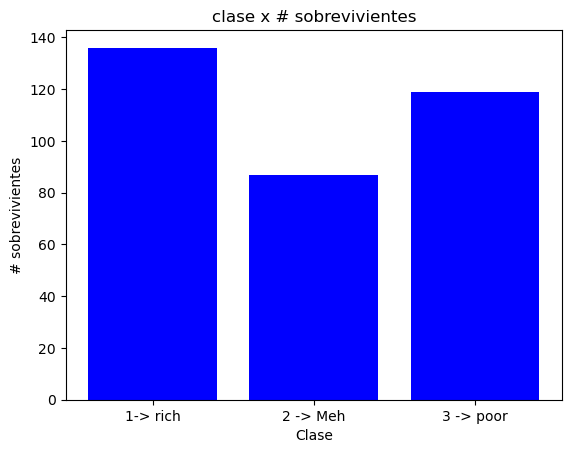

In [11]:
# Crear el gráfico de barras
plt.bar(Pclasses, survived_values, color='blue')

# Agregar etiquetas y título
plt.xlabel('Clase')
plt.ylabel('# sobrevivientes')
plt.title('clase x # sobrevivientes')

# Mostrar el gráfico
plt.show()

In [12]:
nonsurvived_values = [titanic_dataframe[(titanic_dataframe['Survived'] == 0) & (titanic_dataframe['Pclass'] == i)].shape[0] for i in range(1, 4)]
nonsurvived_values

[80, 97, 372]

In [13]:
total_rich_passengers = survived_values[0] + nonsurvived_values[0]
total_middle_passengers = survived_values[1] + nonsurvived_values[1]
total_poor_passengers = survived_values[2] + nonsurvived_values[2]

In [16]:
print("% of rich people that survived: ", (survived_values[0]/ total_rich_passengers)* 100)
print("% of middle people that survived: ", (survived_values[1]/ total_middle_passengers)* 100)
print("% of poor people that survived: ", (survived_values[2]/ total_poor_passengers)* 100)

% of rich people that survived:  62.96296296296296
% of middle people that survived:  47.28260869565217
% of poor people that survived:  24.236252545824847


* **How many passengers were traveling alone?**

In [18]:
lonely_people = titanic_dataframe[(titanic_dataframe['SibSp'] == 0) & (titanic_dataframe['Parch'] == 0)].shape[0]
lonely_people

537

* Fuero 537 las personas solas que fueron al Tetanic

In [20]:
lonely_survived_people = titanic_dataframe[(titanic_dataframe['SibSp'] == 0) & (titanic_dataframe['Parch'] == 0) & (titanic_dataframe['Survived'] == 1)].shape[0]
lonely_survived_people

163

In [21]:
print("% of lonely people that survived: ", (lonely_survived_people/ lonely_people)* 100)

% of lonely people that survived:  30.353817504655495


In [35]:
lonely_nonsurvived_people = titanic_dataframe[(titanic_dataframe['SibSp'] == 0) & (titanic_dataframe['Parch'] == 0) & (titanic_dataframe['Survived'] == 0)].shape[0]
lonely_nonsurvived_people

374

* **Is there a difference between survival rate of passengers traveling alone vs passengers traveling with company?**

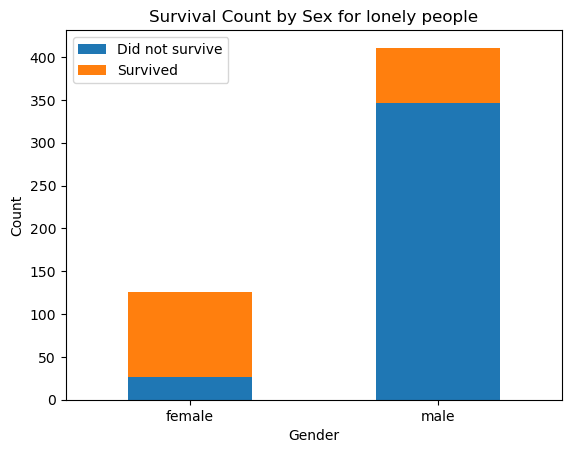

In [25]:

import matplotlib.pyplot as plt

survival_by_gender = titanic_dataframe[(titanic_dataframe['SibSp'] == 0) & (titanic_dataframe['Parch'] == 0)].groupby(['Sex', 'Survived']).size().unstack()

survival_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Sex for lonely people')
plt.xticks(rotation=0)
plt.legend(['Did not survive', 'Survived'], loc='upper left')
plt.show()


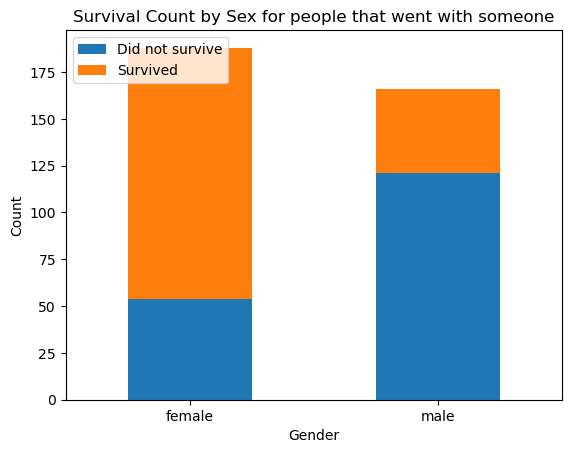

In [28]:

import matplotlib.pyplot as plt

survival_by_gender = titanic_dataframe[(titanic_dataframe['SibSp'] != 0) | (titanic_dataframe['Parch'] != 0)].groupby(['Sex', 'Survived']).size().unstack()

survival_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Sex for people that went with someone')
plt.xticks(rotation=0)
plt.legend(['Did not survive', 'Survived'], loc='upper left')
plt.show()


In [29]:
survived_people_with_someone = titanic_dataframe[((titanic_dataframe['SibSp'] != 0) | (titanic_dataframe['Parch'] != 0)) & (titanic_dataframe['Survived'] == 1)].shape[0]
survived_people_with_someone

179

In [30]:
nonsurvived_people_with_someone = titanic_dataframe[((titanic_dataframe['SibSp'] != 0) | (titanic_dataframe['Parch'] != 0)) & (titanic_dataframe['Survived'] == 0)].shape[0]
nonsurvived_people_with_someone

175

In [31]:
people_with_someone = titanic_dataframe[(titanic_dataframe['SibSp'] != 0) | (titanic_dataframe['Parch'] != 0)].shape[0]
people_with_someone

354

In [32]:
print("% of people that survived and went with someone: ", (survived_people_with_someone/ people_with_someone)* 100)

% of people that survived and went with someone:  50.56497175141242


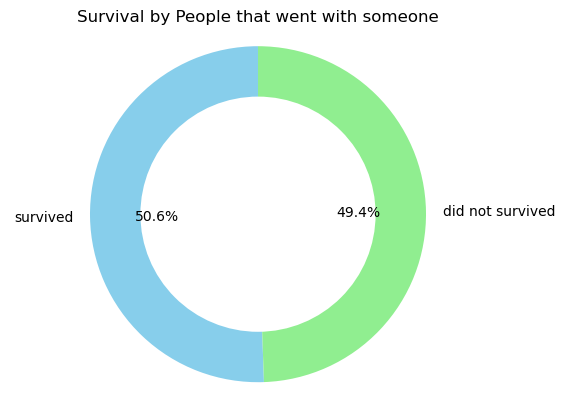

In [34]:
import matplotlib.pyplot as plt

# Datos de ejemplo
labels = ['survived', 'did not survived']
sizes = [survived_people_with_someone, nonsurvived_people_with_someone]  # Porcentajes

# Crear el gráfico de pastel
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])

# Añadir un círculo en el centro para que parezca un donut (opcional)
centro_circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Añadir título
plt.title('Survival by People that went with someone')

# Mostrar el gráfico
plt.axis('equal')  # Así aseguras que el gráfico sea circular
plt.show()

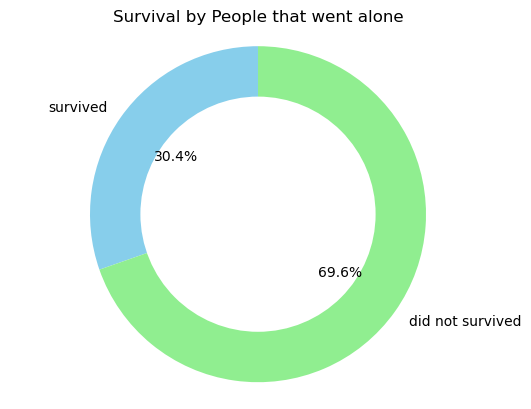

In [37]:
import matplotlib.pyplot as plt

# Datos de ejemplo
labels = ['survived', 'did not survived']
sizes = [lonely_survived_people,lonely_nonsurvived_people ]  # Porcentajes

# Crear el gráfico de pastel
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])

# Añadir un círculo en el centro para que parezca un donut (opcional)
centro_circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Añadir título
plt.title('Survival by People that went alone')

# Mostrar el gráfico
plt.axis('equal')  # Así aseguras que el gráfico sea circular
plt.show()

Podemos ver que sobrevivieron mas la gente que fue con alguien en comparacion de la que fue sola

* **How many families were traveling on the Titanic? Is there a pattern on survival rate?**

In [40]:
number_of_passengers_that_went_in_a_family = titanic_dataframe[titanic_dataframe['Parch'] != 0].shape[0]
number_of_passengers_that_went_in_a_family

213

In [41]:
number_of_passengers_that_went_in_a_family_and_survived = titanic_dataframe[(titanic_dataframe['Parch'] != 0) & (titanic_dataframe['Survived'] == 1)].shape[0]
number_of_passengers_that_went_in_a_family_and_survived

109

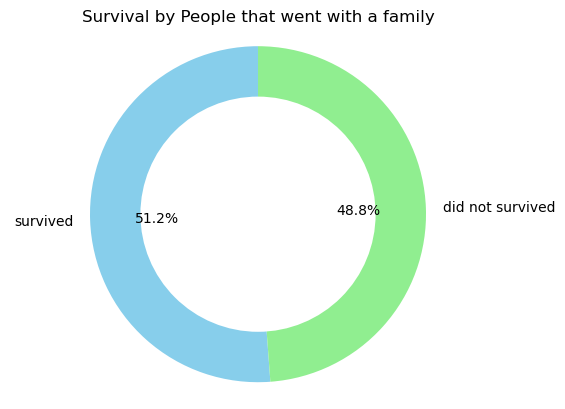

In [42]:
import matplotlib.pyplot as plt

# Datos de ejemplo
labels = ['survived', 'did not survived']
sizes = [number_of_passengers_that_went_in_a_family_and_survived,number_of_passengers_that_went_in_a_family - number_of_passengers_that_went_in_a_family_and_survived ]  # Porcentajes

# Crear el gráfico de pastel
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])

# Añadir un círculo en el centro para que parezca un donut (opcional)
centro_circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Añadir título
plt.title('Survival by People that went with a family')

# Mostrar el gráfico
plt.axis('equal')  # Así aseguras que el gráfico sea circular
plt.show()

Fueron 213 pasajeros que fueron en familia y 109 sobrevivieron

* **Do we have missing or null values in our dataset? How will we tackle them?**

In [43]:
titanic_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Si existen datos vacios, pero como tal trabajaria con la columna de Age con alguna de las siguientes tecnicas:
* Eliminación de filas o columnas
* Imputación simple
* Imputación avanzada (Knn)
* Interpolación

Donde usaria mas el Knn para ver como trabaja con esa columna

Y con la otra columna donde hay valores vacios, yo diria que por el significado de la columna valdria mucho la pena tener sus datos, pero no existen suficientes datos, son mas los vacios que los que vienen en el dataframe :c